## 住宅価格の予測

In [373]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split


In [374]:
data = pd.read_csv('./data/boston.csv')

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [376]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [377]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

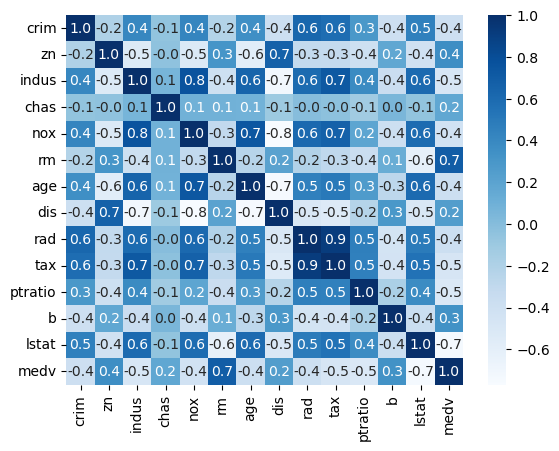

In [378]:
sns.heatmap(data.corr(method="pearson"), annot=True , cmap="Blues", fmt="1.1f")

目的変数のmedvと相関があるのは、rmであるのでこの二つについて単回帰分析行う

In [379]:
X = data[["rm"]]
y = data[["medv"]]

In [380]:
X.head()

,rm
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [381]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [382]:
# model
from sklearn.linear_model import LinearRegression   
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [383]:
print('回帰直線の切片', lr.intercept_[0])
print('回帰直線の傾き', lr.coef_[0][0])
print('決定係数', lr.score(X,y))
print('回帰直線', 'y = ', lr.coef_[0][0], 'x + ', lr.intercept_[0])

回帰直線の切片 -34.67062077643851
回帰直線の傾き 9.1021089811803
決定係数 0.48352545599133423
回帰直線 y =  9.1021089811803 x +  -34.67062077643851


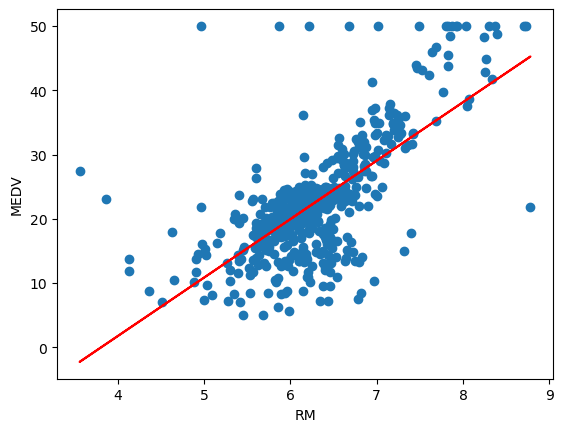

In [384]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [385]:
lr.predict(X)[:5] # 回帰直線の値

array([[25.17574577],
       [23.77402099],
       [30.72803225],
       [29.02593787],
       [30.38215211]])

In [386]:
data = data[data["medv"] != 50]

In [387]:
X = data[["rm"]]
y = data[["medv"]]

In [388]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

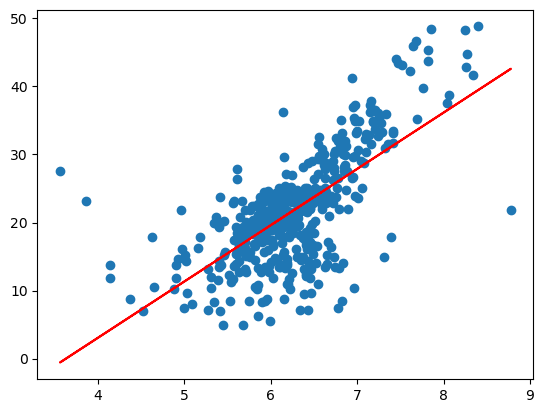

In [389]:
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color='red')

In [390]:
print('回帰直線の切片', lr.intercept_[0])
print('回帰直線の傾き', lr.coef_[0][0])
print('決定係数', lr.score(X,y))
print('回帰直線', 'y = ', lr.coef_[0][0], 'x + ', lr.intercept_[0])

回帰直線の切片 -30.00512014537584
回帰直線の傾き 8.26855732242698
決定係数 0.4714666814451759
回帰直線 y =  8.26855732242698 x +  -30.00512014537584


## 重回帰分析

In [391]:
feature_columns = [ "crim", "zn", "indus","chas", "nox", "rm", "dis", "rad", "tax", "ptratio","b", "lstat" ]
target = "medv"

In [392]:
X = data[feature_columns]
y = data[target]

In [393]:
X.head()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,6.0622,3,222,18.7,396.90,5.33


In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## データの変換

In [395]:
# 標準化することで異なる単位のものを同一尺度で表せるようになる
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
df_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
df_scaled.head()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,b,lstat
0,-0.426528,0.055088,-0.478558,-0.260998,-0.253168,-0.928249,1.068185,-0.519274,-0.577579,-1.596805,0.329702,2.401090
1,-0.451389,2.129396,-1.193895,-0.260998,-1.283977,0.921331,1.134315,-0.981374,-0.850922,-1.405179,0.403620,-1.117274
2,2.440722,-0.490782,1.002797,-0.260998,1.557033,-0.632379,-0.959435,1.675703,1.531914,0.798525,0.382563,1.296126
3,0.603345,-0.490782,1.002797,-0.260998,0.249666,-1.251015,-0.688374,1.675703,1.531914,0.798525,-0.043731,0.735166
4,-0.268643,-0.490782,1.217108,3.831449,2.654887,-0.140318,-1.015610,-0.519274,-0.030894,-1.836339,-0.389855,0.308441


In [396]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [397]:
y_pred = lr.predict(X_train_scaled)
print(y_pred[:5])

[14.31486932 30.96513561 12.3433425  15.62129946 19.73407298]


In [398]:
for xi, wi in zip(feature_columns, lr.coef_):
    print('{0:8s}: {1:6.3f}'.format(xi, wi))
    # 8s : 文字列を8文字で表示 / 6.3f : 6文字で小数点以下3桁まで表示

crim    : -0.934
zn      :  0.929
indus   : -0.405
chas    :  0.184
nox     : -1.729
rm      :  2.104
dis     : -2.349
rad     :  2.129
tax     : -2.039
ptratio : -1.610
b       :  0.672
lstat   : -2.722


In [399]:
# 係数の大きさ順に表示
for i in np.argsort(-lr.coef_):
    print('{0:8s}: {1:6.3f}'.format(feature_columns[i], lr.coef_[i]))

rad     :  2.129
rm      :  2.104
zn      :  0.929
b       :  0.672
chas    :  0.184
indus   : -0.405
crim    : -0.934
ptratio : -1.610
nox     : -1.729
tax     : -2.039
dis     : -2.349
lstat   : -2.722


In [400]:
# 決定係数
print("決定係数: {:.3f}".format(lr.score(X_train_scaled, y_train)))

決定係数: 0.778


In [401]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred)
print("RMSE: {:.3f}".format(mse_train))

RMSE: 12.783


In [402]:
X_test_scaled = scaler.transform(X_test)
y_pred_test = lr.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
print("RMSE: {:.3f}".format(mse_test))

RMSE: 18.733


In [403]:
# 決定係数
print("決定係数: {:.3f}".format(lr.score(X_test_scaled, y_test)))

決定係数: 0.758


## 正則化

In [404]:
# Ridge回帰
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_train_scaled)

# 各行の名前{index}と値{data}を表示
w_ridge = pd.Series(index=feature_columns, data=ridge.coef_) # 正則化項の係数
for xi, wi in zip(feature_columns, ridge.coef_):
    print('{0:8s}: {1:6.3f}'.format(xi, wi))

## L2正則化項を計算するためベクトルのノルムを計算
print('L2正則化項', np.linalg.norm(w_ridge))

ridge_mse_train = mean_squared_error(y_train, y_pred)
print("RMSE: {:.3f}".format(np.sqrt(ridge_mse_train)))

X_test_scaled = scaler.transform(X_test)
y_pred_test = ridge.predict(X_test_scaled)
ridge_mse_test = mean_squared_error(y_test, y_pred_test)
print("RMSE: {:.3f}".format(np.sqrt(ridge_mse_test)))

print("決定係数: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

crim    : -0.921
zn      :  0.913
indus   : -0.425
chas    :  0.188
nox     : -1.703
rm      :  2.112
dis     : -2.316
rad     :  2.054
tax     : -1.970
ptratio : -1.603
b       :  0.672
lstat   : -2.712
L2正則化項 5.7529639159571575
RMSE: 3.575
RMSE: 4.331
決定係数: 0.757


In [405]:
# Lasso回帰
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_train_scaled)

w_lasso = pd.Series(index=feature_columns, data=lasso.coef_) # 正則化項の係数
for xi, wi in zip(feature_columns, lasso.coef_):
    print('{0:8s}: {1:6.3f}'.format(xi, wi))

print("L1正則化項", np.linalg.norm(w_lasso))

lasso_mse_train = mean_squared_error(y_train, y_pred)
print("RMSE: {:.3f}".format(np.sqrt(lasso_mse_train)))

X_test_scaled = scaler.transform(X_test)
y_pred_test = lasso.predict(X_test_scaled)
lasso_mse_test = mean_squared_error(y_test, y_pred_test)
print("RMSE: {:.3f}".format(np.sqrt(lasso_mse_test)))

print("決定係数: {:.3f}".format(lasso.score(X_test_scaled, y_test)))

crim    : -0.000
zn      :  0.000
indus   : -0.185
chas    :  0.000
nox     : -0.021
rm      :  1.953
dis     :  0.000
rad     : -0.000
tax     : -0.638
ptratio : -0.883
b       :  0.052
lstat   : -2.796
L1正則化項 3.5853507531727353
RMSE: 4.155
RMSE: 5.133
決定係数: 0.659


In [406]:
data = {'訓練データMSE':[mse_train, ridge_mse_train, lasso_mse_train], 
        'テストデータMSE':[mse_test, ridge_mse_test, lasso_mse_test], 
        '決定係数':[lr.score(X_test_scaled, y_test), ridge.score(X_test_scaled, y_test), lasso.score(X_test_scaled, y_test)]}
df_mse = pd.DataFrame(data, index=['重回帰','Ridge','Lasso'])

In [407]:
df_mse

,訓練データMSE,テストデータMSE,決定係数
重回帰,12.782772,18.732672,0.757734
Ridge,12.783920,18.757944,0.757407
Lasso,17.266733,26.352773,0.659184
